# 대표적인 CNN(VGG16)

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_path = '/content/notebooks'
# 구글드라이브 deep-learning-from-scratch-3-master 폴더에 있는 패키지를 colab에 심볼링크걸린 notebooks 폴더 생성 
os.symlink('/content/drive/MyDrive/Colab Notebooks/deep-learning-from-scratch-3-master', my_path)
# 파이썬 모듈 검색 경로추가
sys.path.insert(0, my_path)

## 58.1 VGG16 구현

### 489~490 그림

### 490~491 models.py

In [ ]:
# dezero/models.py

import dezero.functions as F
import dezero.layers as L

from dezero import Model

class VGG16(Model):
  def __init__(self):
    super().__init__()
    # 출력 채널 수 만큼 지정
    self.conv1_1 = L.Conv2d(64, kernel_size=3, stride=1, pad=1)
    self.conv1_2 = L.Conv2d(64, kernel_size=3, stride=1, pad=1)
    self.conv2_1 = L.Conv2d(128, kernel_size=3, stride=1, pad=1)
    self.conv2_2 = L.Conv2d(128, kernel_size=3, stride=1, pad=1)
    self.conv3_1 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
    self.conv3_2 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
    self.conv3_3 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
    self.conv4_1 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
    self.conv4_2 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
    self.conv4_3 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
    self.conv5_1 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
    self.conv5_2 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
    self.conv5_3 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
    self.fc6 = L.Linear(4096)  # 출력 크기만 지정
    self.fc7 = L.Linear(4096)
    self.fc8 = L.Linear(1000)

  def forward(self, x):
    x = F.relu(self.conv1_1(x))
    x = F.relu(self.conv1_2(x))
    x = F.pooling(x, 2, 2)
    x = F.relu(self.conv2_1(x))
    x = F.relu(self.conv2_2(x))
    x = F.pooling(x, 2, 2)
    x = F.relu(self.conv3_1(x))
    x = F.relu(self.conv3_2(x))
    x = F.relu(self.conv3_3(x))
    x = F.pooling(x, 2, 2)
    x = F.relu(self.conv4_1(x))
    x = F.relu(self.conv4_2(x))
    x = F.relu(self.conv4_3(x))
    x = F.pooling(x, 2, 2)
    x = F.relu(self.conv5_1(x))
    x = F.relu(self.conv5_2(x))
    x = F.relu(self.conv5_3(x))
    x = F.pooling(x, 2, 2)
    x = F.reshape(x, (x.shape[0], -1))  # 형상 변환 # 추가
    x = F.dropout(F.relu(self.fc6(x)))
    x = F.dropout(F.relu(self.fc7(x)))
    x = self.fc8(x)
    return x

## 58.2 학습된 가중치 데이터

## 492~493 models.py

In [ ]:
# dezero/models.py

from dezero import utils

class VGG16(Model):
  WEIGHTS_PATH = 'http://github.com/koki0702/dezero-models/releases/download/v0.1/vgg16.npz'

  def __init__(self, pretrained=False):
    ### ...
    if pretrained:
      weights_path = utils.get_file(VGG16.WEIGHTS_PATH)
      self.load_weights(weights_path)

### 493

Downloading: vgg16.npz
[##############################] 100.00% Done


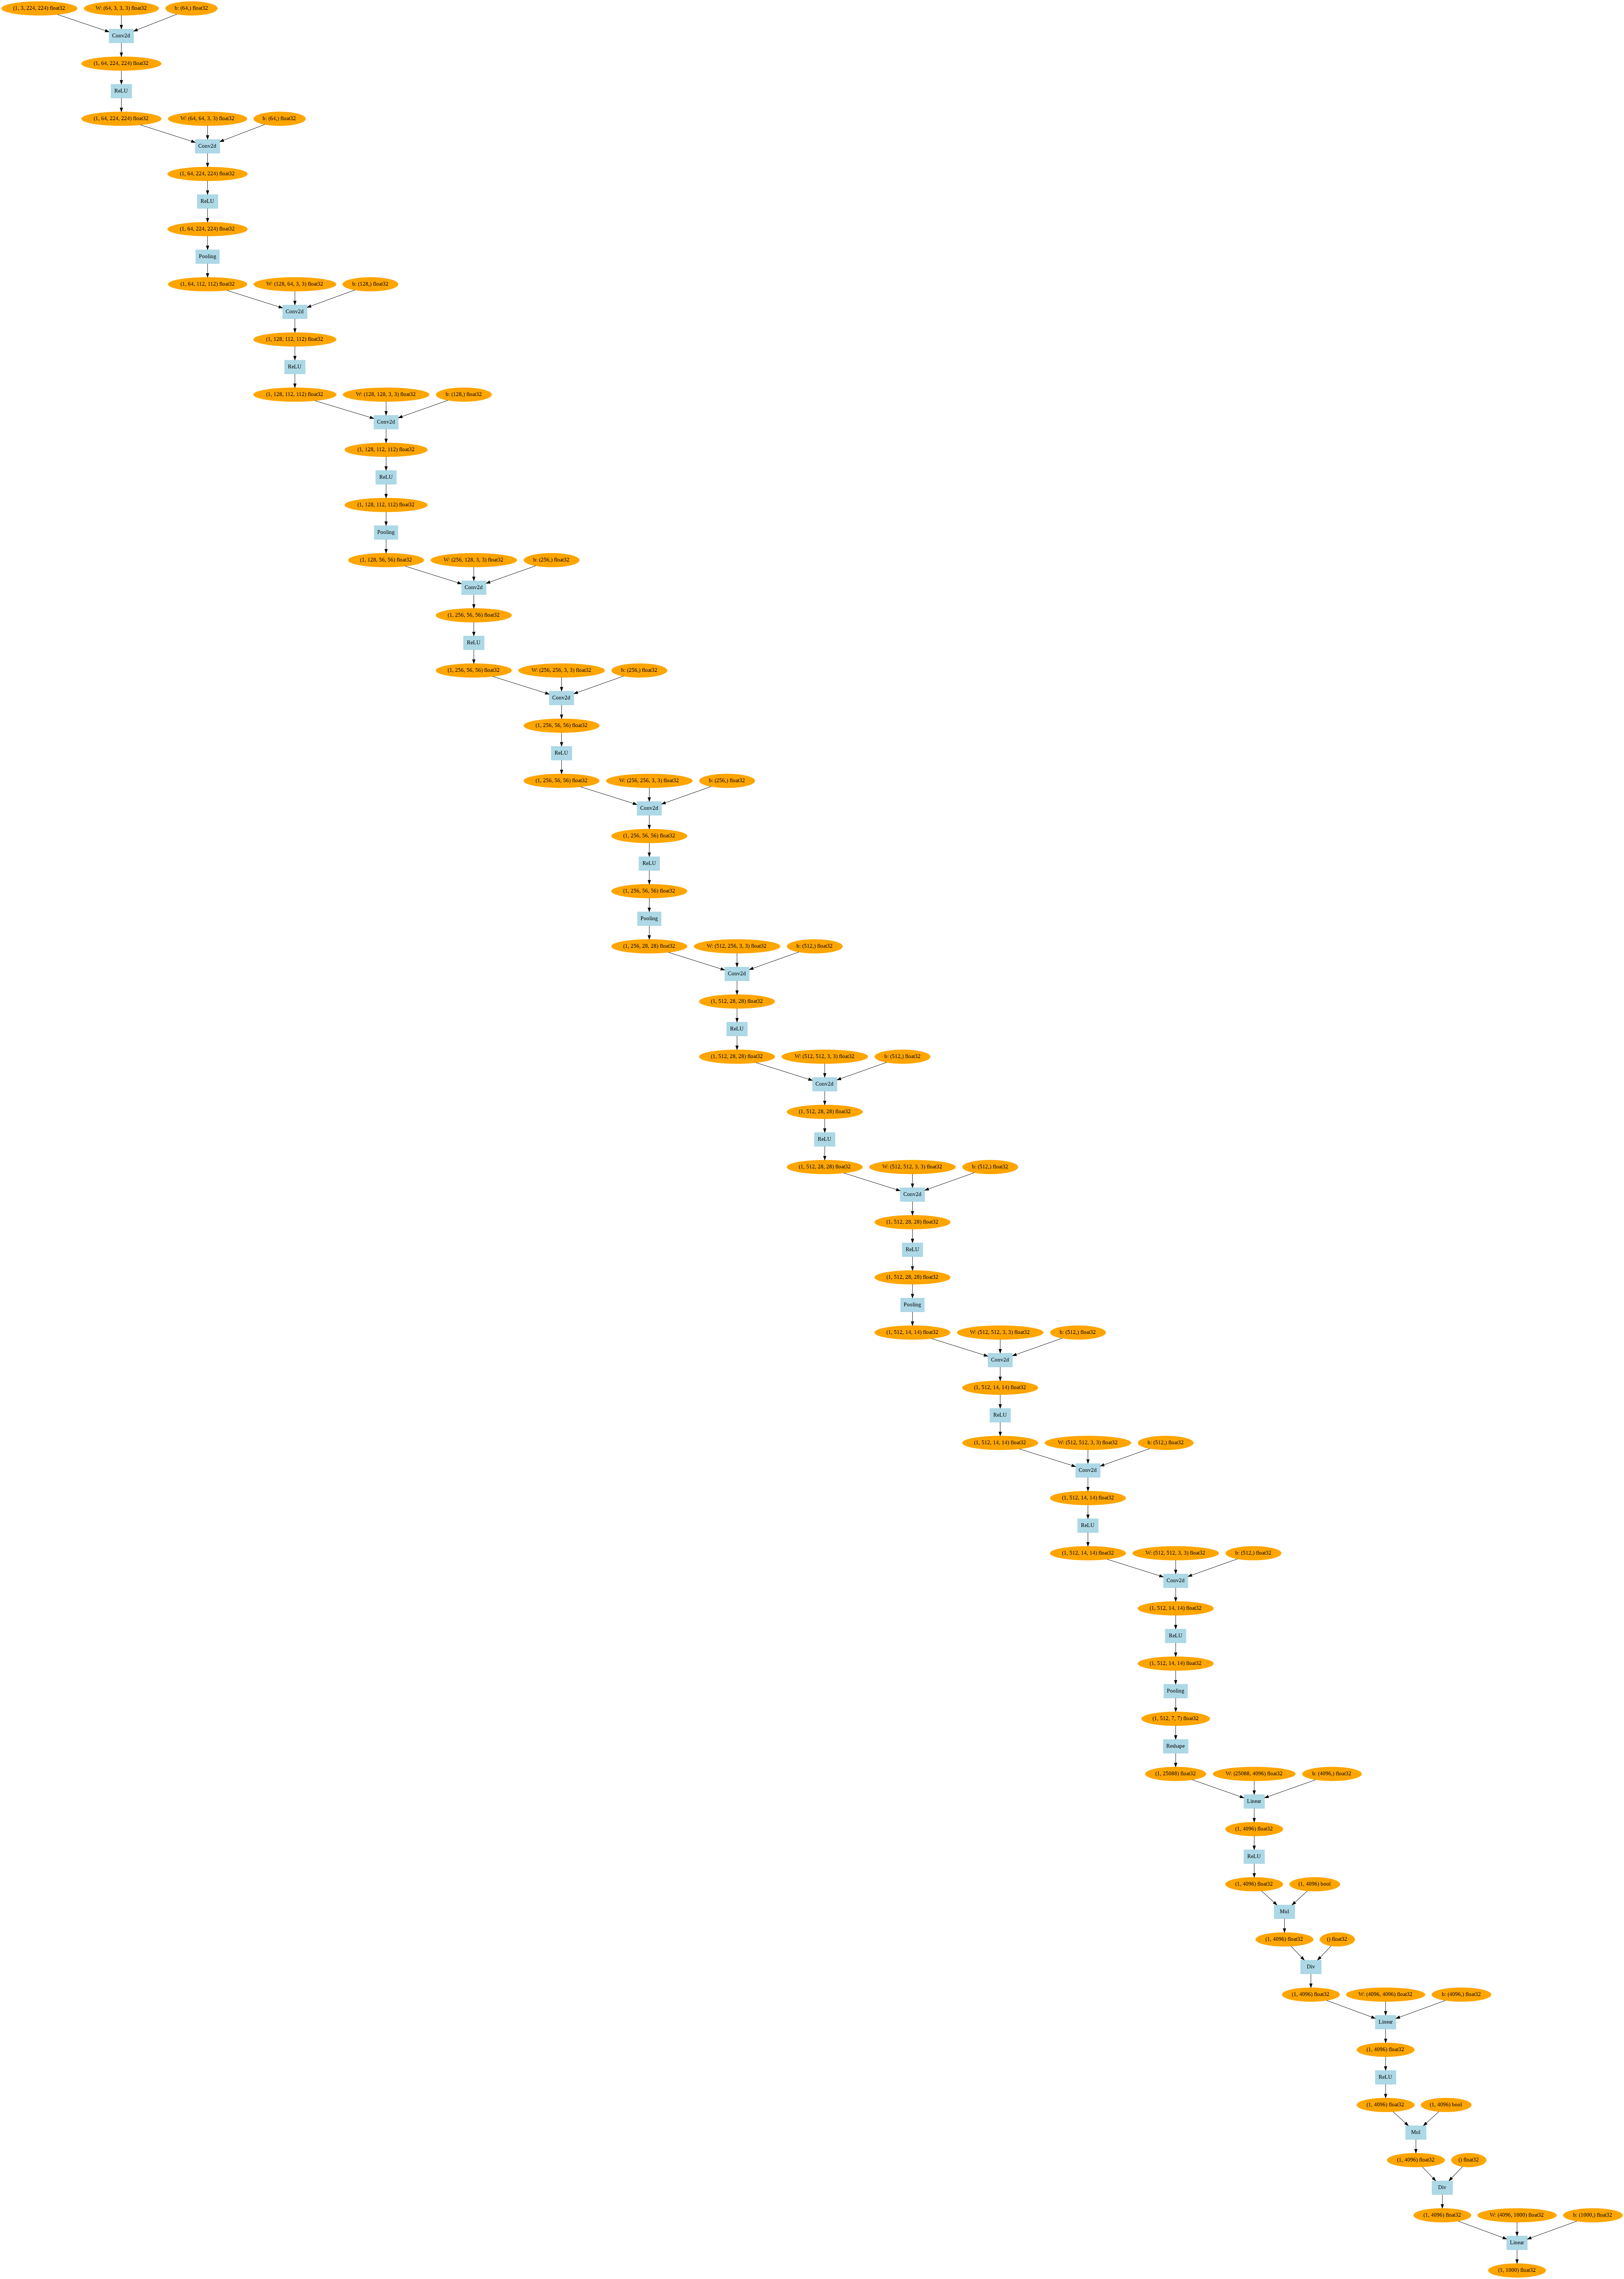

In [ ]:
import numpy as np
from dezero.models import VGG16

model = VGG16(pretrained=True)

x = np.random.randn(1, 3, 224, 224).astype(np.float32)  # 더미 데이터
model.plot(x) # 계산 그래프 시각화

### 494 그림

## 58.3 학습된 VGG16 사용하기

### 495

In [ ]:
# !pip install pillow

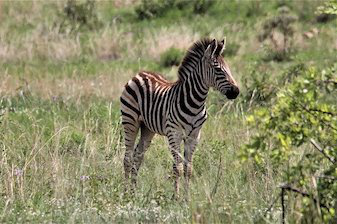

In [ ]:
import dezero
from PIL import Image

url = 'https://github.com/WegraLee/deep-learning-from-scratch-3/raw/images/zebra.jpg'
img_path = dezero.utils.get_file(url)
img = Image.open(img_path)
# img.show() # colab에서 안됨
display(img)

### 496

In [ ]:
from dezero.models import VGG16

x = VGG16.preprocess(img)
print(type(x), x.shape)

<class 'numpy.ndarray'> (3, 224, 224)


### 496~497 step58.py

In [ ]:
# steps/step58.py

import numpy as np
from PIL import Image
import dezero
from dezero.models import VGG16

url = 'https://github.com/Wegralee/deep-learning-from-scrath-3/raw/images/zebra.jpg'

img_path = dezero.utils.get_file(url)
img = Image.open(img_path)
x = VGG16.preprocess(img)
x = x[np.newaxis]  # 배치용 축 추가

model = VGG16(pretrained=True)
with dezero.test_mode():
  y = model(x)
predict_id = np.argmax(y.data)

model.plot(x, to_file='vgg.pdf')  # 계산 그래프 시각화
labels = dezero.datasets.ImageNet.labels()  # 이미지넷의 레이블
print(labels[predict_id])

Downloading: imagenet1000_clsidx_to_labels.txt
[##############################] 100.00% Done
zebra
